## Libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline 
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 300)

from statsmodels.formula.api import ols
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats import weightstats
from scipy.stats.stats import pearsonr
from sklearn.model_selection import train_test_split
import scipy as sp
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

## Data Cleaning, EDA, Feature Engineering

In [2]:
# read in csv
df = pd.read_csv('marketing_campaign.csv', sep=';' )

In [3]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [4]:
df.shape

(2240, 29)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
ID                     2240 non-null int64
Year_Birth             2240 non-null int64
Education              2240 non-null object
Marital_Status         2240 non-null object
Income                 2216 non-null float64
Kidhome                2240 non-null int64
Teenhome               2240 non-null int64
Dt_Customer            2240 non-null object
Recency                2240 non-null int64
MntWines               2240 non-null int64
MntFruits              2240 non-null int64
MntMeatProducts        2240 non-null int64
MntFishProducts        2240 non-null int64
MntSweetProducts       2240 non-null int64
MntGoldProds           2240 non-null int64
NumDealsPurchases      2240 non-null int64
NumWebPurchases        2240 non-null int64
NumCatalogPurchases    2240 non-null int64
NumStorePurchases      2240 non-null int64
NumWebVisitsMonth      2240 non-null int64
AcceptedCmp3           2240 

In [6]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

### Holy smokes - we are missing some income data!

- let's check out how many
- then add in the median for the missing values

In [7]:
df.Income.isna().value_counts()

False    2216
True       24
Name: Income, dtype: int64

In [8]:
df_na = np.where(df.Income.isna() == True)

In [9]:
df_na

(array([  10,   27,   43,   48,   58,   71,   90,   91,   92,  128,  133,
         312,  319, 1379, 1382, 1383, 1386, 2059, 2061, 2078, 2079, 2081,
        2084, 2228]),)

In [10]:
df['Income'][2084]

nan

In [11]:
print(df.loc[[10]])
print(df.loc[[2228]])

      ID  Year_Birth   Education Marital_Status  Income  Kidhome  Teenhome  \
10  1994        1983  Graduation        Married     NaN        1         0   

   Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
10  2013-11-15       11         5          5                6   

    MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
10                0                 2             1                  1   

    NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
10                1                    0                  2   

    NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
10                  7             0             0             0             0   

    AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  
10             0         0              3         11         0  
        ID  Year_Birth Education Marital_Status  Income  Kidhome  Teenhome  \
2228  8720        1978  2n Cycle       Together     NaN        0 

In [12]:
df.Income.describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

In [13]:
df.Income = df.Income.fillna(value=df.Income.median())

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
ID                     2240 non-null int64
Year_Birth             2240 non-null int64
Education              2240 non-null object
Marital_Status         2240 non-null object
Income                 2240 non-null float64
Kidhome                2240 non-null int64
Teenhome               2240 non-null int64
Dt_Customer            2240 non-null object
Recency                2240 non-null int64
MntWines               2240 non-null int64
MntFruits              2240 non-null int64
MntMeatProducts        2240 non-null int64
MntFishProducts        2240 non-null int64
MntSweetProducts       2240 non-null int64
MntGoldProds           2240 non-null int64
NumDealsPurchases      2240 non-null int64
NumWebPurchases        2240 non-null int64
NumCatalogPurchases    2240 non-null int64
NumStorePurchases      2240 non-null int64
NumWebVisitsMonth      2240 non-null int64
AcceptedCmp3           2240 

#### let's make all the columns lowercase because easier to work with

In [15]:
df.columns = map(str.lower, df.columns)

In [16]:
df['income'] = df.income.astype(int)

In [17]:
df.head()

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,z_costcontact,z_revenue,response
0,5524,1957,Graduation,Single,58138,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


#### - now let's check out the z_revenue and z_costcontact 
#### - looks like ALL values are the same for both columns
#### - goodbye columns - we don't need them 

In [18]:
df['z_revenue'].describe()

count    2240.0
mean       11.0
std         0.0
min        11.0
25%        11.0
50%        11.0
75%        11.0
max        11.0
Name: z_revenue, dtype: float64

In [19]:
df['z_costcontact'].describe()

count    2240.0
mean        3.0
std         0.0
min         3.0
25%         3.0
50%         3.0
75%         3.0
max         3.0
Name: z_costcontact, dtype: float64

In [20]:
working_df = df.drop(['z_costcontact', 'z_revenue'], axis=1)

In [21]:
working_df.head()

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,response
0,5524,1957,Graduation,Single,58138,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0


### Date Features 

- let's work with the date information we have
- first we'll convert the values to datetime
- then we will create a new column for "today's date" - 2014-06-30
- then we will subtract that new column from dt_customer in order to produce a NEW column called days_customer

In [22]:
working_df['dt_customer'] = pd.to_datetime(working_df['dt_customer'])

In [23]:
working_df['dt_customer'].max()

Timestamp('2014-06-29 00:00:00')

In [24]:
working_df['dt_customer'].min()

Timestamp('2012-07-30 00:00:00')

In [25]:
working_df['current_date'] = pd.to_datetime('2014-06-30')

In [26]:
pd.to_datetime(working_df['current_date'])

0      2014-06-30
1      2014-06-30
2      2014-06-30
3      2014-06-30
4      2014-06-30
          ...    
2235   2014-06-30
2236   2014-06-30
2237   2014-06-30
2238   2014-06-30
2239   2014-06-30
Name: current_date, Length: 2240, dtype: datetime64[ns]

In [27]:
print(working_df['current_date'])
print(working_df['dt_customer'])

0      2014-06-30
1      2014-06-30
2      2014-06-30
3      2014-06-30
4      2014-06-30
          ...    
2235   2014-06-30
2236   2014-06-30
2237   2014-06-30
2238   2014-06-30
2239   2014-06-30
Name: current_date, Length: 2240, dtype: datetime64[ns]
0      2012-09-04
1      2014-03-08
2      2013-08-21
3      2014-02-10
4      2014-01-19
          ...    
2235   2013-06-13
2236   2014-06-10
2237   2014-01-25
2238   2014-01-24
2239   2012-10-15
Name: dt_customer, Length: 2240, dtype: datetime64[ns]


In [28]:
working_df['days_customer'] = (working_df['current_date'] - working_df['dt_customer']).dt.days

In [29]:
working_df.head()

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,response,current_date,days_customer
0,5524,1957,Graduation,Single,58138,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,2014-06-30,664
1,2174,1954,Graduation,Single,46344,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,2014-06-30,114
2,4141,1965,Graduation,Together,71613,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,2014-06-30,313
3,6182,1984,Graduation,Together,26646,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,2014-06-30,140
4,5324,1981,PhD,Married,58293,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,2014-06-30,162


#### Marital Status

- okay, so we've got to clean up some of these (hilarious) marital status values
- let's assume that YOLO (still hilarious), Absurd (a bit nihilistic), and Alone columns are all actually Single

In [30]:
working_df.marital_status.value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: marital_status, dtype: int64

In [31]:
working_df['marital_status']= np.where(working_df['marital_status'] == 'Alone', 'Single', working_df['marital_status'])
working_df['marital_status']= np.where(working_df['marital_status'] == 'Absurd', 'Single', working_df['marital_status'])
working_df['marital_status']= np.where(working_df['marital_status'] == 'YOLO', 'Single', working_df['marital_status'])

In [32]:
working_df['age'] = 2016 - working_df['year_birth']

In [33]:
working_df.marital_status.value_counts()

Married     864
Together    580
Single      487
Divorced    232
Widow        77
Name: marital_status, dtype: int64

### Generation feature



#### Breakdown of Generations:

The Greatest Generation (or GI Generation)
Born in 1924 or earlier.

The Silent Generation
Born 1925-1945 (Sometimes listed as 1925-1942).

Baby Boomers
Born 1946-1964 (Sometimes listed as 1943-1964)

Generation X
Born 1965-1980 (Sometimes listed as 1965-1979)

Millennials
Born 1981-1996 (Sometimes listed as 1980-2000)

Generation Z or Gen Z (sometimes called post-millennials)
Born 1997-current

- let's bin these together to produce a new ordinal column called 'generation'

In [34]:
bins = [1925, 1946, 1965, 1981, 1997]

bins_year_birth = pd.cut(working_df['year_birth'], bins, include_lowest = True, labels = ('silent', 'boomer', 'x', 'millennial'))
working_df['generation'] = bins_year_birth.cat.as_unordered()

In [35]:
working_df.head()

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,response,current_date,days_customer,age,generation
0,5524,1957,Graduation,Single,58138,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,2014-06-30,664,59,boomer
1,2174,1954,Graduation,Single,46344,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,2014-06-30,114,62,boomer
2,4141,1965,Graduation,Together,71613,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,2014-06-30,313,51,boomer
3,6182,1984,Graduation,Together,26646,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,2014-06-30,140,32,millennial
4,5324,1981,PhD,Married,58293,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,2014-06-30,162,35,x


### Education feature

- let's do something similar with the education column to create 'edu_level'

In [36]:
working_df['education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: education, dtype: int64

In [37]:
edu_level = []
for level in working_df['education']:
    if level == 'Basic':
        edu_level.append(1)
    elif level == 'Graduation':
        edu_level.append(2)
    elif level == '2n Cycle':
        edu_level.append(3)
    elif level == 'Master':
        edu_level.append(4)
    else:
        edu_level.append(5)
working_df['edu_level'] = edu_level

In [38]:
working_df.head()

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,response,current_date,days_customer,age,generation,edu_level
0,5524,1957,Graduation,Single,58138,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,2014-06-30,664,59,boomer,2
1,2174,1954,Graduation,Single,46344,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,2014-06-30,114,62,boomer,2
2,4141,1965,Graduation,Together,71613,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,2014-06-30,313,51,boomer,2
3,6182,1984,Graduation,Together,26646,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,2014-06-30,140,32,millennial,2
4,5324,1981,PhD,Married,58293,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,2014-06-30,162,35,x,5


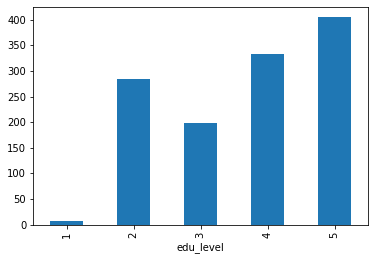

In [39]:
working_df.groupby('edu_level')['mntwines'].mean().plot(kind='bar');

### Dummies!

- let's take the categorical columns we have and turn them into dummies in anticipation of our modeling later!

In [40]:
working_df = pd.concat([working_df, pd.get_dummies(working_df['kidhome'], prefix='kid_')], 1)
working_df = pd.concat([working_df, pd.get_dummies(working_df['teenhome'], prefix='teen_')], 1)
working_df = pd.concat([working_df, pd.get_dummies(working_df['complain'], prefix='complain_')], 1)
working_df = pd.concat([working_df, pd.get_dummies(working_df['generation'], prefix='generation_')], 1)
working_df = pd.concat([working_df, pd.get_dummies(working_df['marital_status'], prefix='marital_status_')], 1)
working_df = pd.concat([working_df, pd.get_dummies(working_df['education'], prefix='education_')], 1)

In [41]:
working_df.head()

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,response,current_date,days_customer,age,generation,edu_level,kid__0,kid__1,kid__2,teen__0,teen__1,teen__2,complain__0,complain__1,generation__silent,generation__boomer,generation__x,generation__millennial,marital_status__Divorced,marital_status__Married,marital_status__Single,marital_status__Together,marital_status__Widow,education__2n Cycle,education__Basic,education__Graduation,education__Master,education__PhD
0,5524,1957,Graduation,Single,58138,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,2014-06-30,664,59,boomer,2,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
1,2174,1954,Graduation,Single,46344,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,2014-06-30,114,62,boomer,2,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
2,4141,1965,Graduation,Together,71613,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,2014-06-30,313,51,boomer,2,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
3,6182,1984,Graduation,Together,26646,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,2014-06-30,140,32,millennial,2,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
4,5324,1981,PhD,Married,58293,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,2014-06-30,162,35,x,5,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1


In [42]:
working_df.columns = map(str.lower, working_df.columns)

In [43]:
working_df.head()

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,response,current_date,days_customer,age,generation,edu_level,kid__0,kid__1,kid__2,teen__0,teen__1,teen__2,complain__0,complain__1,generation__silent,generation__boomer,generation__x,generation__millennial,marital_status__divorced,marital_status__married,marital_status__single,marital_status__together,marital_status__widow,education__2n cycle,education__basic,education__graduation,education__master,education__phd
0,5524,1957,Graduation,Single,58138,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,2014-06-30,664,59,boomer,2,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
1,2174,1954,Graduation,Single,46344,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,2014-06-30,114,62,boomer,2,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
2,4141,1965,Graduation,Together,71613,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,2014-06-30,313,51,boomer,2,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
3,6182,1984,Graduation,Together,26646,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,2014-06-30,140,32,millennial,2,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
4,5324,1981,PhD,Married,58293,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,2014-06-30,162,35,x,5,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1


In [44]:
working_df.shape

(2240, 54)

In [45]:
# working_df.to_csv('cleaned_data.csv')

## EDA Continued

In [46]:
# clean_df = pd.read_csv('cleaned_data.csv', index_col=0)

In [47]:
clean_df = working_df

In [48]:
clean_df.head()

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,response,current_date,days_customer,age,generation,edu_level,kid__0,kid__1,kid__2,teen__0,teen__1,teen__2,complain__0,complain__1,generation__silent,generation__boomer,generation__x,generation__millennial,marital_status__divorced,marital_status__married,marital_status__single,marital_status__together,marital_status__widow,education__2n cycle,education__basic,education__graduation,education__master,education__phd
0,5524,1957,Graduation,Single,58138,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,2014-06-30,664,59,boomer,2,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
1,2174,1954,Graduation,Single,46344,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,2014-06-30,114,62,boomer,2,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
2,4141,1965,Graduation,Together,71613,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,2014-06-30,313,51,boomer,2,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
3,6182,1984,Graduation,Together,26646,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,2014-06-30,140,32,millennial,2,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
4,5324,1981,PhD,Married,58293,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,2014-06-30,162,35,x,5,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1


In [49]:
# i noticed that one of my dummy columns has a space in the title
clean_df.columns = clean_df.columns.str.replace(' ', '_')

### Cleaning up the outliers

In [50]:
clean_df.head()

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,response,current_date,days_customer,age,generation,edu_level,kid__0,kid__1,kid__2,teen__0,teen__1,teen__2,complain__0,complain__1,generation__silent,generation__boomer,generation__x,generation__millennial,marital_status__divorced,marital_status__married,marital_status__single,marital_status__together,marital_status__widow,education__2n_cycle,education__basic,education__graduation,education__master,education__phd
0,5524,1957,Graduation,Single,58138,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,2014-06-30,664,59,boomer,2,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
1,2174,1954,Graduation,Single,46344,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,2014-06-30,114,62,boomer,2,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
2,4141,1965,Graduation,Together,71613,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,2014-06-30,313,51,boomer,2,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
3,6182,1984,Graduation,Together,26646,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,2014-06-30,140,32,millennial,2,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
4,5324,1981,PhD,Married,58293,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,2014-06-30,162,35,x,5,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1


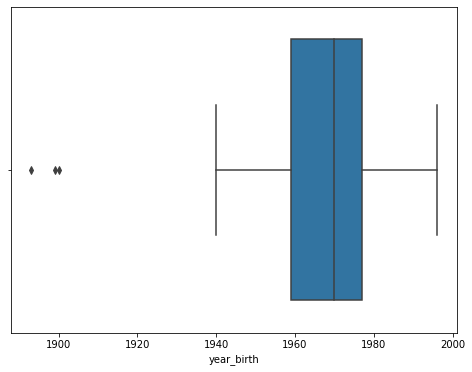

In [51]:
plt.figure(figsize=(8,6))
sns.boxplot(clean_df.year_birth);

In [52]:
clean_df['year_birth'].sort_values(ascending =True).head(10)

239     1893
339     1899
192     1900
1950    1940
424     1941
1150    1943
415     1943
2084    1943
358     1943
1923    1943
Name: year_birth, dtype: int64

In [53]:
clean_df.shape

(2240, 54)

In [54]:
clean_df = clean_df[clean_df['year_birth'] >= 1940]

In [55]:
clean_df.shape

(2237, 54)

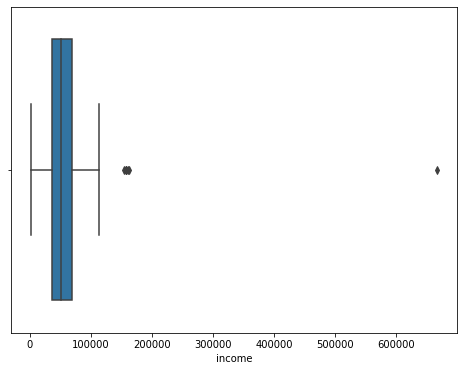

In [56]:
plt.figure(figsize=(8,6))
sns.boxplot(clean_df.income);

In [57]:
clean_df['income'].sort_values(ascending =False).head(10)

2233    666666
617     162397
687     160803
1300    157733
164     157243
1653    157146
2132    156924
655     153924
1898    113734
646     105471
Name: income, dtype: int64

In [58]:
clean_df.shape

(2237, 54)

In [59]:
clean_df = clean_df[clean_df['income'] <= 170000]

In [60]:
clean_df.shape

(2236, 54)

### Checking on correlations

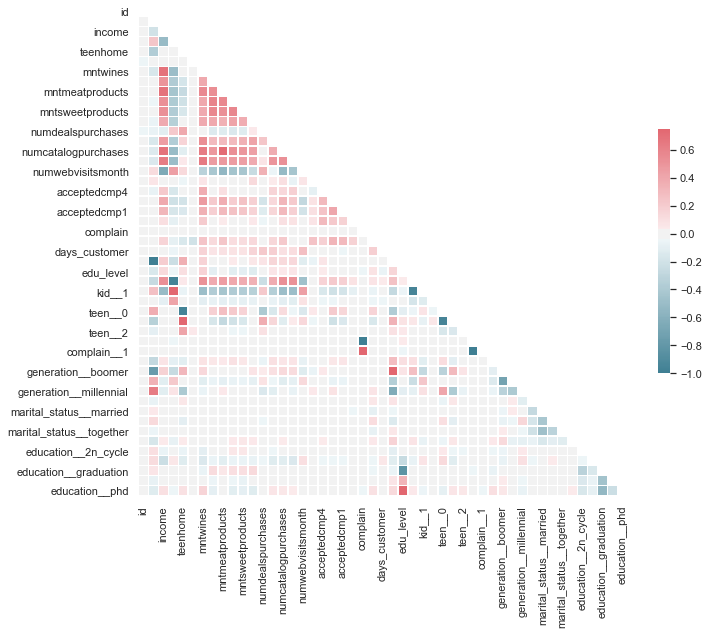

In [61]:
sns.set(style="white")
corr = clean_df.corr() 

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.75, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

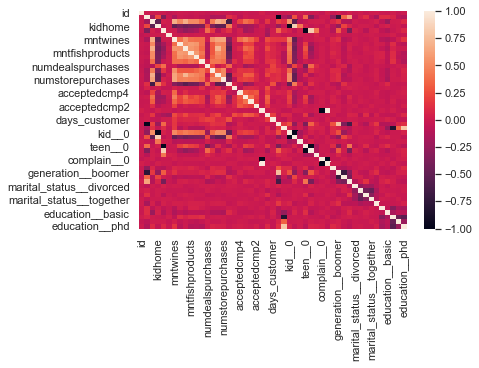

In [62]:
sns.heatmap(clean_df.corr());

## Statistical Analysis

## Insight: Wine purchases average more than any other product

In [63]:
clean_df.describe()

,id,year_birth,income,kidhome,teenhome,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,response,days_customer,age,edu_level,kid__0,kid__1,kid__2,teen__0,teen__1,teen__2,complain__0,complain__1,generation__silent,generation__boomer,generation__x,generation__millennial,marital_status__divorced,marital_status__married,marital_status__single,marital_status__together,marital_status__widow,education__2n_cycle,education__basic,education__graduation,education__master,education__phd
count,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.00000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.00000,2236.000000,2236.000000,2236.000000
mean,5589.008497,1968.898032,51952.608676,0.444097,0.506708,49.116279,304.12746,26.275939,166.983453,37.536225,27.080501,43.983005,2.326029,4.087657,2.663238,5.795617,5.318873,0.072898,0.074687,0.072451,0.064401,0.013417,0.008945,0.149374,354.773256,47.101968,3.047406,0.577370,0.401163,0.021467,0.516547,0.460197,0.023256,0.991055,0.008945,0.017889,0.365385,0.461986,0.154741,0.103309,0.386404,0.217352,0.258497,0.034436,0.089893,0.02415,0.503578,0.165474,0.216905
std,3244.826887,11.703281,21411.466994,0.538459,0.544609,28.957284,336.59181,39.724007,225.689645,54.648562,41.299504,52.061568,1.933032,2.779988,2.923898,3.251129,2.426886,0.260027,0.262944,0.259291,0.245520,0.115077,0.094173,0.356536,202.181561,11.703281,1.277402,0.494088,0.490244,0.144967,0.499838,0.498525,0.150749,0.094173,0.094173,0.132578,0.481646,0.498664,0.361738,0.304431,0.487034,0.412537,0.437907,0.182388,0.286092,0.15355,0.500099,0.371691,0.412230
min,0.000000,1940.000000,1730.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,20.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35502.500000,0.000000,0.000000,24.000000,24.00000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,181.750000,39.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,5454.500000,1970.000000,51381.000000,0.000000,0.000000,49.000000,174.00000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,357.000000,46.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000
75%,8421.750000,1977.000000,68275.750000,1.000000,1.000000,74.000000,504.25000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,530.000000,57.000000,4.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.0

### Data Hypothesis based on the finding that wine will be our target for modeling 

#### Hypothesis 1:

Hypothesis

- H0: there is NO difference between wine purchases and generation
- Ha: there MAY be a difference between wine purchases and generation

Test:

- One way Anova

Interpretation:

- based on a Pvalue of 1.0141061574564154e-13 we can REJECT the null hypothesis because there IS a statistically significat difference between generations

In [64]:
clean_df.columns

Index(['id', 'year_birth', 'education', 'marital_status', 'income', 'kidhome',
       'teenhome', 'dt_customer', 'recency', 'mntwines', 'mntfruits',
       'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts',
       'mntgoldprods', 'numdealspurchases', 'numwebpurchases',
       'numcatalogpurchases', 'numstorepurchases', 'numwebvisitsmonth',
       'acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5', 'acceptedcmp1',
       'acceptedcmp2', 'complain', 'response', 'current_date', 'days_customer',
       'age', 'generation', 'edu_level', 'kid__0', 'kid__1', 'kid__2',
       'teen__0', 'teen__1', 'teen__2', 'complain__0', 'complain__1',
       'generation__silent', 'generation__boomer', 'generation__x',
       'generation__millennial', 'marital_status__divorced',
       'marital_status__married', 'marital_status__single',
       'marital_status__together', 'marital_status__widow',
       'education__2n_cycle', 'education__basic', 'education__graduation',
       'education__master', 'educat

In [65]:
stats.f_oneway(clean_df['mntwines'][clean_df['generation'] == 'silent'],
               clean_df['mntwines'][clean_df['generation'] == 'boomer'],
               clean_df['mntwines'][clean_df['generation'] == 'x'],
               clean_df['mntwines'][clean_df['generation'] == 'millennial'])

F_onewayResult(statistic=21.489949503884393, pvalue=1.0141061574564154e-13)

#### Hypothesis 2:

Hypothesis

- H0: there is NO difference between wine purchases and marital status
- Ha: there MAY be a difference between wine purchases and status

Test:

- One way Anova

Interpretation:

- based on a Pvalue of 0.2778187945380709 we CANNOT reject the null hypothesis because there is NOT a statistically significat difference between marital status

In [66]:
stats.f_oneway(clean_df['mntwines'][clean_df['marital_status'] == 'Single'],
               clean_df['mntwines'][clean_df['marital_status'] == 'Together'],
               clean_df['mntwines'][clean_df['marital_status'] == 'Married'],
               clean_df['mntwines'][clean_df['marital_status'] == 'Divorced'],
               clean_df['mntwines'][clean_df['marital_status'] == 'Widow'])

F_onewayResult(statistic=1.2743054835344934, pvalue=0.2778187945380709)

#### Hypothesis 2 - proof

- i was kind of surprised that there was NOT a significant difference, so I ran a ttest of Single against all the other marital status' to see the pvalues for each
- assumes an alpha of .05

In [67]:
from scipy.stats import ttest_ind

ttest_ind(clean_df[clean_df['marital_status'] == 'Single']['mntwines'], clean_df[clean_df['marital_status'] == 'Married']['mntwines'], equal_var=False, nan_policy='omit')

Ttest_indResult(statistic=-0.5702924683389233, pvalue=0.5686047652594786)

In [68]:
from scipy.stats import ttest_ind

ttest_ind(clean_df[clean_df['marital_status'] == 'Single']['mntwines'], clean_df[clean_df['marital_status'] == 'Together']['mntwines'], equal_var=False, nan_policy='omit')

Ttest_indResult(statistic=-0.8729016566937529, pvalue=0.3829193950930099)

In [69]:
from scipy.stats import ttest_ind

ttest_ind(clean_df[clean_df['marital_status'] == 'Single']['mntwines'], clean_df[clean_df['marital_status'] == 'Divorced']['mntwines'], equal_var=False, nan_policy='omit')

Ttest_indResult(statistic=-1.3710336399755767, pvalue=0.17107314249337738)

In [70]:
from scipy.stats import ttest_ind

ttest_ind(clean_df[clean_df['marital_status'] == 'Single']['mntwines'], clean_df[clean_df['marital_status'] == 'Widow']['mntwines'], equal_var=False, nan_policy='omit')

Ttest_indResult(statistic=-1.9695213718797306, pvalue=0.05162649223713187)

## Visualizations

- the following visualizations were used to determine my target demographic recommendation
- it very much looks like the millennial generation is poised to grow and ALSO drinks wine
- additionally, based on education level, Basic and 2n Cycle look to be underserved

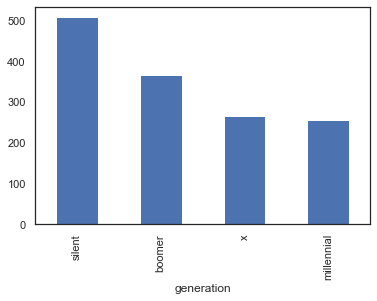

In [127]:
clean_df.groupby('generation')['mntwines'].mean().plot(kind='bar');

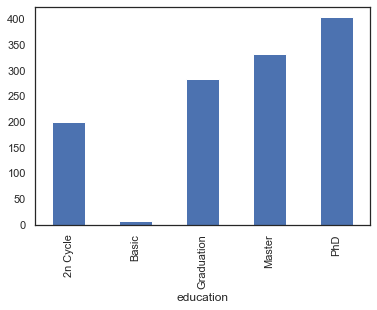

In [129]:
clean_df.groupby('education')['mntwines'].mean().plot(kind='bar');

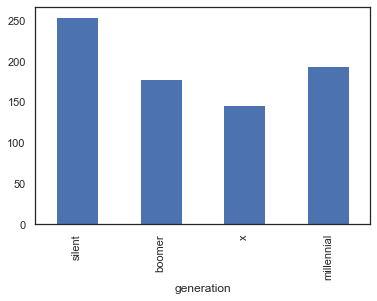

In [128]:
clean_df.groupby('generation')['mntmeatproducts'].mean().plot(kind='bar');

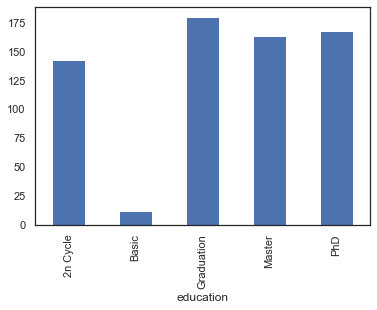

In [130]:
clean_df.groupby('education')['mntmeatproducts'].mean().plot(kind='bar');

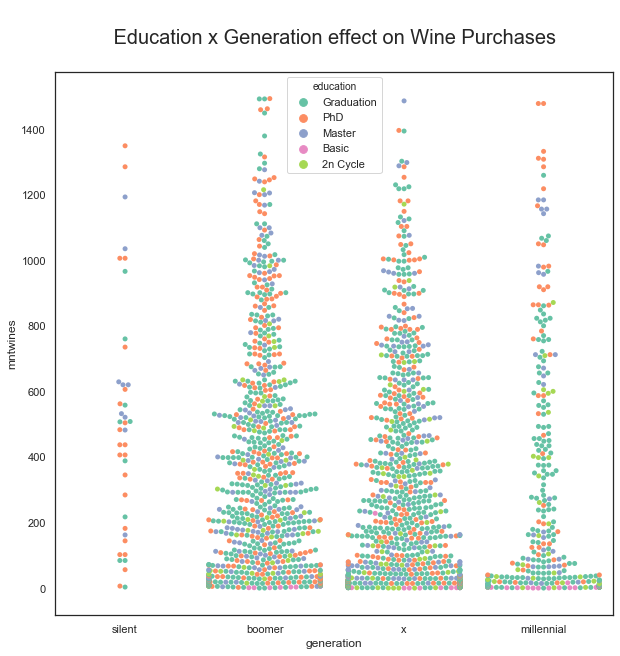

In [132]:
plt.figure(figsize=(10,10)) #making graph large enough to see
plt.title('\n Education x Generation effect on Wine Purchases \n', fontsize=20) #adding a title
ax = sns.swarmplot(x="generation", y="mntwines", hue = "education", data=clean_df, palette="Set2") #defining what variables we want in our graph

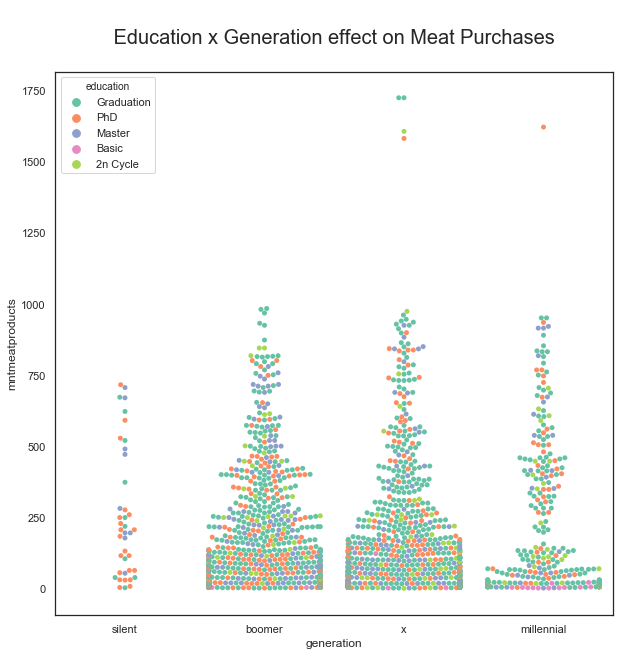

In [74]:
plt.figure(figsize=(10,10)) #making graph large enough to see
plt.title('\n Education x Generation effect on Meat Purchases \n', fontsize=20) #adding a title
ax = sns.swarmplot(x="generation", y="mntmeatproducts", hue = "education", data=clean_df, palette="Set2") #defining what variables we want in our graph

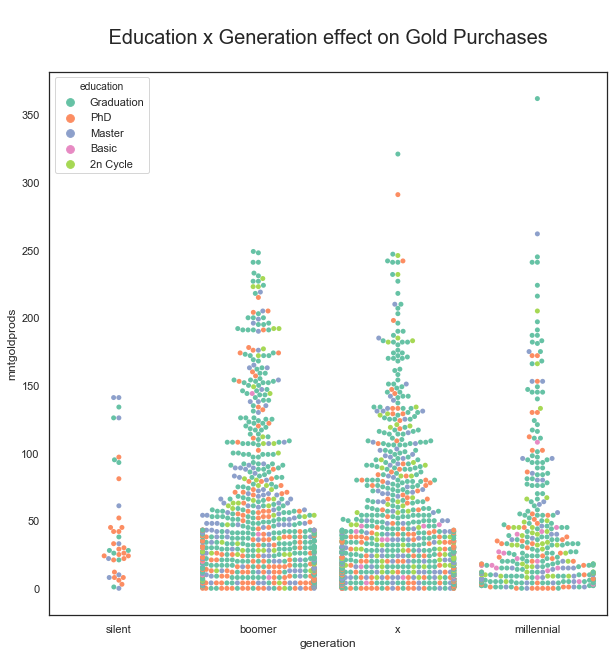

In [75]:
plt.figure(figsize=(10,10)) #making graph large enough to see
plt.title('\n Education x Generation effect on Gold Purchases \n', fontsize=20) #adding a title
ax = sns.swarmplot(x="generation", y="mntgoldprods", hue = "education", data=clean_df, palette="Set2") #defining what variables we want in our graph

In [76]:
clean_df.mntwines.describe()

count    2236.00000
mean      304.12746
std       336.59181
min         0.00000
25%        24.00000
50%       174.00000
75%       504.25000
max      1493.00000
Name: mntwines, dtype: float64

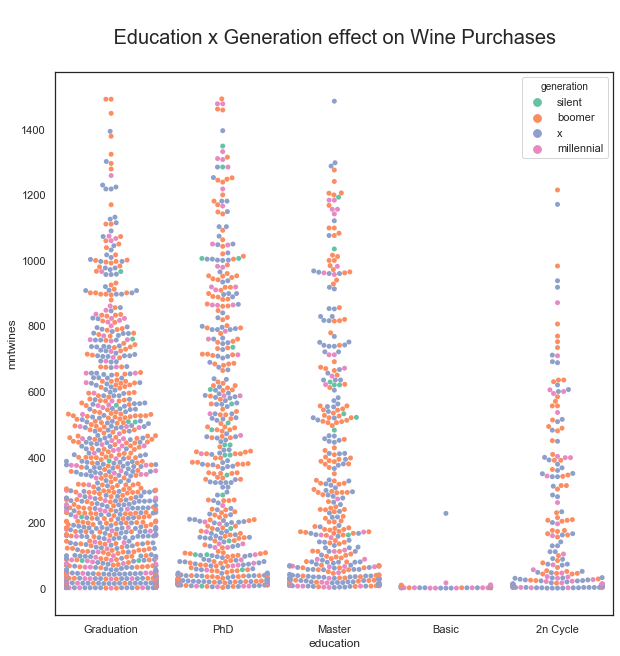

In [77]:
plt.figure(figsize=(10,10)) #making graph large enough to see
plt.title('\n Education x Generation effect on Wine Purchases \n', fontsize=20) #adding a title
ax = sns.swarmplot(x="education", y="mntwines", hue = "generation", data=clean_df, palette="Set2") #defining what variables we want in our graph

In [78]:
clean_df.mntmeatproducts.describe()

count    2236.000000
mean      166.983453
std       225.689645
min         0.000000
25%        16.000000
50%        67.000000
75%       232.000000
max      1725.000000
Name: mntmeatproducts, dtype: float64

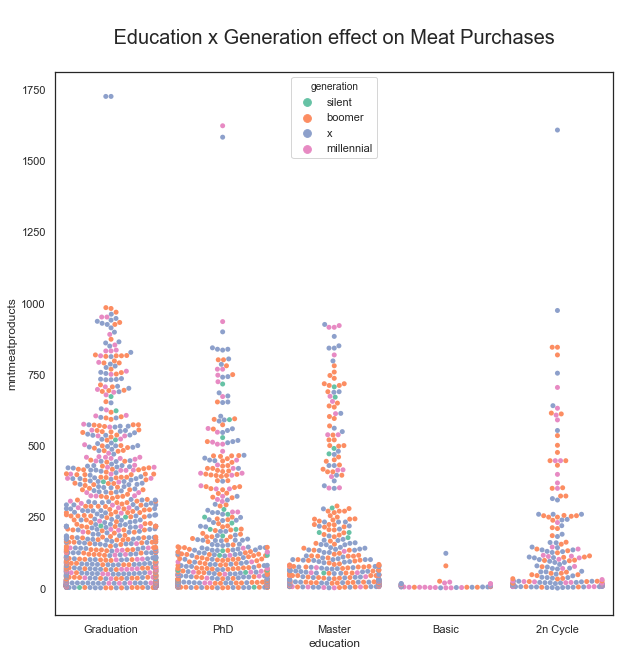

In [79]:
plt.figure(figsize=(10,10)) #making graph large enough to see
plt.title('\n Education x Generation effect on Meat Purchases \n', fontsize=20) #adding a title
ax = sns.swarmplot(x="education", y="mntmeatproducts", hue = "generation", data=clean_df, palette="Set2") #defining what variables we want in our graph

## Models

### Model 1 - regression using clean_df and the following columns:

year_birth
income
edu_level
numdealspurchases
numwebpurchases
numcatalogpurchases
numstorepurchases
numwebvisitsmonth
acceptedcmp1
acceptedcmp2
acceptedcmp3
acceptedcmp4
acceptedcmp5
response

- essentially all numerical columns and NO categorical
- produced an R-squared number of 0.703

In [80]:
clean_df_lr = ols(formula='mntwines~year_birth+income+edu_level+numdealspurchases+numwebpurchases+numcatalogpurchases+numstorepurchases+numwebvisitsmonth+acceptedcmp1+acceptedcmp2+acceptedcmp3+acceptedcmp4+acceptedcmp5+response', data=df).fit()

clean_df_lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               mntwines   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     376.2
Date:                Sun, 21 Jun 2020   Prob (F-statistic):               0.00
Time:                        22:40:39   Log-Likelihood:                -14853.
No. Observations:                2240   AIC:                         2.974e+04
Df Residuals:                    2225   BIC:                         2.982e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1573.3581    664.847      2.366      0.018     269.573    2877.143
year_birth             -0.9732      0.337     -2.891      0.004      -1.633      -0.313
income                  0.0016      0.000      7.247      0.000       0.001       0.002
edu_level              27.0928      3.109      8.715      0.000      20.996      33.189
numdealspurchases      -8.4862      2.311     -3.672      0.000     -13.018      -3.955
numwebpurchases        21.6738      1.787     12.127      0.000      18.169      25.179
numcatalogpurchases    33.3776      1.905     17.520      0.000      29.642      37.114
numstorepurchases      31.9969      1.656     19.324      0.000      28.750      35.244
numwebvisitsmonth      18.0499      2.355      7.664      0.000      13.432      22.668
acceptedcmp1           54.9981     18.274      3.010      0.003      19.163      90.833
acceptedcmp2          100.9480     36.153      2.792      0.005      30.050     171.846
acceptedcmp3           35.1267     15.911      2.208      0.027       3.924      66.329
acceptedcmp4          186.4570     16.607     11.228      0.000     153.890     219.024
acceptedcmp5          261.0540     18.217     14.330      0.000     225.330     296.778
response                4.7840     12.444      0.384      0.701     -19.620      29.188
==============================================================================
Omnibus:                      271.875   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2561.323
Skew:                           0.164   Prob(JB):                         0.00
Kurtosis:                       8.228   Cond. No.                     9.91e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.91e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Model 2 - regression using test_df and DROPPED following columns:

id
year_birth
education
marital_status
kidhome
teenhome
dt_customer
complain
current_date
generation
edu_level

- i dropped all columns made redundant or not necessary from feature engineering
- first i checked if correlations changed from dropping the columns - only a little
- i then ran another regression and produced an R-squared number of 0.726
- looks like we're going to work with the test_df moving forward!

In [81]:
test_df = clean_df.drop(labels= ['id', 'year_birth', 'education', 'marital_status', 'kidhome', 'teenhome', 'dt_customer',
                           'complain', 'current_date', 'generation', 'edu_level'], axis= 1)

In [82]:
test_df.head()

,income,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,response,days_customer,age,kid__0,kid__1,kid__2,teen__0,teen__1,teen__2,complain__0,complain__1,generation__silent,generation__boomer,generation__x,generation__millennial,marital_status__divorced,marital_status__married,marital_status__single,marital_status__together,marital_status__widow,education__2n_cycle,education__basic,education__graduation,education__master,education__phd
0,58138,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,1,664,59,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
1,46344,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,114,62,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
2,71613,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,313,51,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
3,26646,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,140,32,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
4,58293,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,162,35,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1


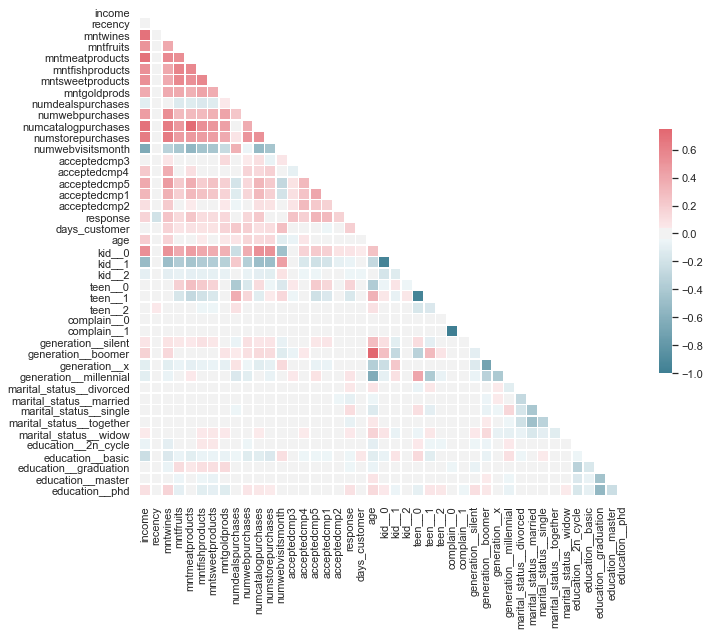

In [83]:
sns.set(style="white")
test_corr = test_df.corr() 

mask = np.zeros_like(test_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(test_corr, mask=mask, cmap=cmap, vmax=.75, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

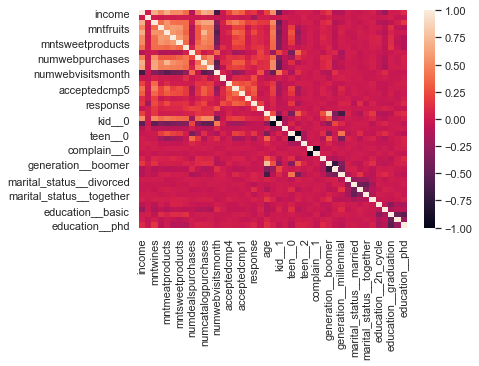

In [84]:
sns.heatmap(test_df.corr());

In [85]:
abs(test_corr) > 0.75 #this provides a table displaying "true" where correlations between two variables are greater than .75

,income,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,response,days_customer,age,kid__0,kid__1,kid__2,teen__0,teen__1,teen__2,complain__0,complain__1,generation__silent,generation__boomer,generation__x,generation__millennial,marital_status__divorced,marital_status__married,marital_status__single,marital_status__together,marital_status__widow,education__2n_cycle,education__basic,education__graduation,education__master,education__phd
income,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
recency,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
mntwines,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
mntfruits,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
mntmeatproducts,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
mntfishproducts,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
mntsweetproducts,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
mntgoldprods,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
numdealspurchases,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
numwebpurchases,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [86]:
test_df.head()

,income,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,response,days_customer,age,kid__0,kid__1,kid__2,teen__0,teen__1,teen__2,complain__0,complain__1,generation__silent,generation__boomer,generation__x,generation__millennial,marital_status__divorced,marital_status__married,marital_status__single,marital_status__together,marital_status__widow,education__2n_cycle,education__basic,education__graduation,education__master,education__phd
0,58138,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,1,664,59,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
1,46344,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,114,62,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
2,71613,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,313,51,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
3,26646,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,140,32,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
4,58293,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,162,35,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1


In [87]:
test_df.columns

Index(['income', 'recency', 'mntwines', 'mntfruits', 'mntmeatproducts',
       'mntfishproducts', 'mntsweetproducts', 'mntgoldprods',
       'numdealspurchases', 'numwebpurchases', 'numcatalogpurchases',
       'numstorepurchases', 'numwebvisitsmonth', 'acceptedcmp3',
       'acceptedcmp4', 'acceptedcmp5', 'acceptedcmp1', 'acceptedcmp2',
       'response', 'days_customer', 'age', 'kid__0', 'kid__1', 'kid__2',
       'teen__0', 'teen__1', 'teen__2', 'complain__0', 'complain__1',
       'generation__silent', 'generation__boomer', 'generation__x',
       'generation__millennial', 'marital_status__divorced',
       'marital_status__married', 'marital_status__single',
       'marital_status__together', 'marital_status__widow',
       'education__2n_cycle', 'education__basic', 'education__graduation',
       'education__master', 'education__phd'],
      dtype='object')

In [88]:
test_df_lr = ols(formula='mntwines~income+recency+mntfruits+mntmeatproducts+mntfishproducts+mntsweetproducts+mntgoldprods+numdealspurchases+numwebpurchases+numcatalogpurchases+numstorepurchases+numwebvisitsmonth+acceptedcmp3+acceptedcmp4+acceptedcmp5+acceptedcmp1+acceptedcmp2+response+days_customer+age+kid__0+kid__1+kid__2+teen__0+teen__1+teen__2+complain__0+complain__1+generation__silent+generation__boomer+generation__x+generation__millennial+marital_status__divorced+marital_status__married+marital_status__single+marital_status__together+marital_status__widow+education__2n_cycle+education__basic+education__graduation+education__master+education__phd', data=test_df).fit()

test_df_lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               mntwines   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     162.0
Date:                Sun, 21 Jun 2020   Prob (F-statistic):               0.00
Time:                        22:40:41   Log-Likelihood:                -14735.
No. Observations:                2236   AIC:                         2.954e+04
Df Residuals:                    2199   BIC:                         2.976e+04
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                 -149.9256     20.124     -7.450      0.000    -189.390    -110.461
income                       0.0037      0.000     10.377      0.000       0.003       0.004
recency                      0.1241      0.134      0.924      0.356      -0.139       0.387
mntfruits                   -0.0420      0.132     -0.317      0.751      -0.302       0.218
mntmeatproducts              0.1022      0.029      3.469      0.001       0.044       0.160
mntfishproducts             -0.0133      0.101     -0.131      0.895      -0.211       0.185
mntsweetproducts            -0.3945      0.127     -3.112      0.002      -0.643      -0.146
mntgoldprods                 0.1623      0.091      1.791      0.073      -0.015       0.340
numdealspurchases           -4.6914      2.570     -1.825      0.068      -9.732       0.349
numwebpurchases             16.7394      1.886      8.873      0.000      13.040      20.439
numcatalogpurchases         21.7534      2.223      9.785      0.000      17.394      26.113
numstorepurchases           26.8030      1.723     15.552      0.000      23.423      30.183
numwebvisitsmonth           22.5763      2.588      8.722      0.000      17.500      27.652
acceptedcmp3                48.5438     15.628      3.106      0.002      17.897      79.191
acceptedcmp4               174.3556     16.426     10.615      0.000     142.144     206.567
acceptedcmp5               238.6767     18.119     13.172      0.000     203.144     274.209
acceptedcmp1                59.6308     17.987      3.315      0.001      24.357      94.904
acceptedcmp2               100.3857     35.192      2.853      0.004      31.372     169.399
response                   -12.8575     12.995     -0.989      0.323     -38.341      12.626
days_customer                0.0993      0.022      4.596      0.000       0.057       0.142
age                          0.3300      0.877      0.376      0.707      -1.390       2.050
kid__0                     -13.7298     11.881     -1.156      0.248     -37.028       9.568
kid__1                     -62.0879     11.348     -5.471      0.000     -84.341     -39.835
kid__2                     -74.1079     19.757     -3.751      0.000    -112.852     -35.364
teen__0                    -49.5782     10.871     -4.561      0.000     -70.897     -28.259
teen__1                    -53.7758     11.061     -4.862      0.000     -75.466     -32.085
teen__2                    -46.5716     19.548     -2.382      0.017     -84.907      -8.236
complain__0                -54.9503     19.283     -2.850      0.004     -92.765     -17.135
complain__1                -94.9753     25.224     -3.765      0.000    -144.442     -45.509
generation__silent         -44.0395     31.546     -1.396      0.163    -105.902      17.824
generation__bo

## Different Models for producing the best fit

Below are the following tests I ran on the data - results are summarized at the end:

- Linear 
- Polynomial
- F-Test
- Recursive
- Lasso

Before we can get started, however, we will need to produce an 80/20 split of the data for the tests.
Also, scaling was done AFTER the split to reduce data leakage

## Train/Test Split

In [89]:
target = test_df['mntwines']
df_features = test_df.drop(columns= ['mntwines'])

In [90]:
X_train, X_test, y_train, y_test = train_test_split(df_features, target, random_state=25,test_size=0.2)

In [91]:
scaler = StandardScaler()

# fit the scaler to the training data
scaler.fit(X_train)

#transform the training data
X_train = pd.DataFrame(data=scaler.transform(X_train), columns=df_features.columns)

#transform the testing dat
X_test = pd.DataFrame(data=scaler.transform(X_test), columns=df_features.columns)

## Linear 

In [92]:
#instantiate a linear regression object
lm = LinearRegression()

#fit the linear regression to the data
lm = lm.fit(X_train, y_train)

y_train_pred = lm.predict(X_train)

train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))


print('Training Root Mean Squared Error:' , train_rmse)
print("This is the r2 number:", r2_score(y_train, y_train_pred))

Training Root Mean Squared Error: 172.02446760608765
This is the r2 number: 0.7328327537833788


In [93]:
#use fitted model to predict on the test examples
y_pred = lm.predict(X_test)

#evaluate the predictions on the test examples
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Testing Root Mean Squared Error:' , test_rmse)


print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))
print("This is the r2 number:", r2_score(y_test, y_pred))

Testing Root Mean Squared Error: 196.58156017150185
Training:  172 vs. Testing:  196
This is the r2 number: 0.6850644337462928


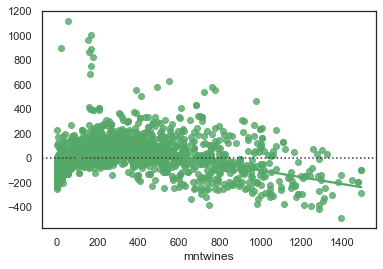

In [94]:
sns.residplot( y_train, y_train_pred,lowess=True, color="g");

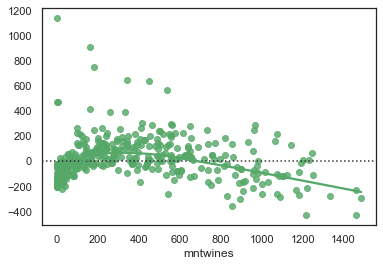

In [95]:
sns.residplot( y_test, y_pred, lowess=True, color="g");

## Polynomial (2)

In [96]:
poly_2 = PolynomialFeatures(degree=2, include_bias=False)
poly2_data = poly_2.fit_transform(df_features)
poly2_columns = poly_2.get_feature_names(df_features.columns)
df_poly2 = pd.DataFrame(poly2_data, columns=poly2_columns)
df_poly2.head()

,income,recency,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,response,days_customer,age,kid__0,kid__1,kid__2,teen__0,teen__1,teen__2,complain__0,complain__1,generation__silent,generation__boomer,generation__x,generation__millennial,marital_status__divorced,marital_status__married,marital_status__single,marital_status__together,marital_status__widow,education__2n_cycle,education__basic,education__graduation,education__master,education__phd,income^2,income recency,income mntfruits,income mntmeatproducts,income mntfishproducts,income mntsweetproducts,income mntgoldprods,income numdealspurchases,income numwebpurchases,income numcatalogpurchases,income numstorepurchases,income numwebvisitsmonth,income acceptedcmp3,income acceptedcmp4,income acceptedcmp5,income acceptedcmp1,income acceptedcmp2,income response,income days_customer,income age,income kid__0,income kid__1,income kid__2,income teen__0,income teen__1,income teen__2,income complain__0,income complain__1,income generation__silent,income generation__boomer,income generation__x,income generation__millennial,income marital_status__divorced,income marital_status__married,income marital_status__single,income marital_status__together,income marital_status__widow,income education__2n_cycle,income education__basic,income education__graduation,income education__master,income education__phd,recency^2,recency mntfruits,recency mntmeatproducts,recency mntfishproducts,recency mntsweetproducts,recency mntgoldprods,recency numdealspurchases,recency numwebpurchases,recency numcatalogpurchases,recency numstorepurchases,recency numwebvisitsmonth,recency acceptedcmp3,recency acceptedcmp4,recency acceptedcmp5,recency acceptedcmp1,recency acceptedcmp2,recency response,recency days_customer,recency age,recency kid__0,recency kid__1,recency kid__2,recency teen__0,recency teen__1,recency teen__2,recency complain__0,recency complain__1,recency generation__silent,recency generation__boomer,recency generation__x,recency generation__millennial,recency marital_status__divorced,recency marital_status__married,recency marital_status__single,recency marital_status__together,recency marital_status__widow,recency education__2n_cycle,recency education__basic,recency education__graduation,recency education__master,recency education__phd,mntfruits^2,mntfruits mntmeatproducts,mntfruits mntfishproducts,mntfruits mntsweetproducts,mntfruits mntgoldprods,mntfruits numdealspurchases,mntfruits numwebpurchases,mntfruits numcatalogpurchases,mntfruits numstorepurchases,mntfruits numwebvisitsmonth,mntfruits acceptedcmp3,mntfruits acceptedcmp4,mntfruits acceptedcmp5,mntfruits acceptedcmp1,mntfruits acceptedcmp2,mntfruits response,mntfruits days_customer,mntfruits age,mntfruits kid__0,mntfruits kid__1,mntfruits kid__2,mntfruits teen__0,mntfruits teen__1,mntfruits teen__2,mntfruits complain__0,...,teen__2 generation__silent,teen__2 generation__boomer,teen__2 generation__x,teen__2 generation__millennial,teen__2 marital_status__divorced,teen__2 marital_status__married,teen__2 marital_status__single,teen__2 marital_status__together,teen__2 marital_status__widow,teen__2 education__2n_cycle,teen__2 education__basic,teen__2 education__graduation,teen__2 education__master,teen__2 education__phd,complain__0^2,complain__0 complain__1,complain__0 generation__silent,complain__0 generation__boomer,complain__0 generation__x,complain__0 generation__millennial,complain__0 marital_status__divorced,complain__0 marital_status__married,complain__0 marital_status__single,complain__0 marital_status__together,complain__0 marital_status__widow,complain__0 education__2n_cycle,complain__0 education__basic,complain__0 education__graduation,complain__0 education__master,complain__0 education__phd,complain__1^2,complain__1 generation__silent,complain__1 generation__boomer,

In [97]:
df_poly2.shape

(2236, 945)

In [98]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(df_poly2, target, random_state=25,test_size=0.2)

In [99]:
scaler2 = StandardScaler()
scaled = scaler2.fit(X_train2)

X_train2 = pd.DataFrame(data=scaler2.transform(X_train2), columns=df_poly2.columns)

X_test2 = pd.DataFrame(data=scaler2.transform(X_test2), columns=df_poly2.columns)

In [100]:
X_test2.head()

,income,recency,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,response,days_customer,age,kid__0,kid__1,kid__2,teen__0,teen__1,teen__2,complain__0,complain__1,generation__silent,generation__boomer,generation__x,generation__millennial,marital_status__divorced,marital_status__married,marital_status__single,marital_status__together,marital_status__widow,education__2n_cycle,education__basic,education__graduation,education__master,education__phd,income^2,income recency,income mntfruits,income mntmeatproducts,income mntfishproducts,income mntsweetproducts,income mntgoldprods,income numdealspurchases,income numwebpurchases,income numcatalogpurchases,income numstorepurchases,income numwebvisitsmonth,income acceptedcmp3,income acceptedcmp4,income acceptedcmp5,income acceptedcmp1,income acceptedcmp2,income response,income days_customer,income age,income kid__0,income kid__1,income kid__2,income teen__0,income teen__1,income teen__2,income complain__0,income complain__1,income generation__silent,income generation__boomer,income generation__x,income generation__millennial,income marital_status__divorced,income marital_status__married,income marital_status__single,income marital_status__together,income marital_status__widow,income education__2n_cycle,income education__basic,income education__graduation,income education__master,income education__phd,recency^2,recency mntfruits,recency mntmeatproducts,recency mntfishproducts,recency mntsweetproducts,recency mntgoldprods,recency numdealspurchases,recency numwebpurchases,recency numcatalogpurchases,recency numstorepurchases,recency numwebvisitsmonth,recency acceptedcmp3,recency acceptedcmp4,recency acceptedcmp5,recency acceptedcmp1,recency acceptedcmp2,recency response,recency days_customer,recency age,recency kid__0,recency kid__1,recency kid__2,recency teen__0,recency teen__1,recency teen__2,recency complain__0,recency complain__1,recency generation__silent,recency generation__boomer,recency generation__x,recency generation__millennial,recency marital_status__divorced,recency marital_status__married,recency marital_status__single,recency marital_status__together,recency marital_status__widow,recency education__2n_cycle,recency education__basic,recency education__graduation,recency education__master,recency education__phd,mntfruits^2,mntfruits mntmeatproducts,mntfruits mntfishproducts,mntfruits mntsweetproducts,mntfruits mntgoldprods,mntfruits numdealspurchases,mntfruits numwebpurchases,mntfruits numcatalogpurchases,mntfruits numstorepurchases,mntfruits numwebvisitsmonth,mntfruits acceptedcmp3,mntfruits acceptedcmp4,mntfruits acceptedcmp5,mntfruits acceptedcmp1,mntfruits acceptedcmp2,mntfruits response,mntfruits days_customer,mntfruits age,mntfruits kid__0,mntfruits kid__1,mntfruits kid__2,mntfruits teen__0,mntfruits teen__1,mntfruits teen__2,mntfruits complain__0,...,teen__2 generation__silent,teen__2 generation__boomer,teen__2 generation__x,teen__2 generation__millennial,teen__2 marital_status__divorced,teen__2 marital_status__married,teen__2 marital_status__single,teen__2 marital_status__together,teen__2 marital_status__widow,teen__2 education__2n_cycle,teen__2 education__basic,teen__2 education__graduation,teen__2 education__master,teen__2 education__phd,complain__0^2,complain__0 complain__1,complain__0 generation__silent,complain__0 generation__boomer,complain__0 generation__x,complain__0 generation__millennial,complain__0 marital_status__divorced,complain__0 marital_status__married,complain__0 marital_status__single,complain__0 marital_status__together,complain__0 marital_status__widow,complain__0 education__2n_cycle,complain__0 education__basic,complain__0 education__graduation,complain__0 education__master,complain__0 education__phd,complain__1^2,complain__1 generation__silent,complain__1 generation__boomer,

In [133]:
lm_2 = LinearRegression()

lm_2 = lm_2.fit(X_train2, y_train2)

y_train_pred2 = lm_2.predict(X_train2)

train2_rmse = np.sqrt(metrics.mean_squared_error(y_train2, y_train_pred2))

print('Training Root Mean Squared Error:' , train2_rmse)
print("This is the r2 number:", r2_score(y_train2, y_train_pred2))

Training Root Mean Squared Error: 87.43126820497908
This is the r2 number: 0.9309861389565699


In [102]:
y_pred2 = lm_2.predict(X_test2)

test2_rmse = np.sqrt(metrics.mean_squared_error(y_test2, y_pred2))

print('Testing Root Mean Squared Error:' , test2_rmse)
print("This is the r2 number:", r2_score(y_test2, y_pred2))

Testing Root Mean Squared Error: 3425072180673.2207
This is the r2 number: -9.560390038500187e+19


In [103]:
print('Training: ', int(train2_rmse), "vs. Testing: ", int(test2_rmse))

Training:  87 vs. Testing:  3425072180673


## F-test

In [104]:
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression
X_train3, X_test3, y_train3, y_test3 = train_test_split(df_features, target, random_state=25,test_size=0.2)
selector = SelectKBest(f_regression, k=15)
selector.fit(X_train3, y_train3)

SelectKBest(k=15, score_func=<function f_regression at 0x1a1e5033b0>)

In [105]:
selected_columns = X_train3.columns[selector.get_support()]
removed_columns = X_train3.columns[~selector.get_support()]
# X_train = X_train3[selected_columns]
# X_test = X_test3[selected_columns]

In [106]:
list(removed_columns)

['recency',
 'numdealspurchases',
 'acceptedcmp3',
 'acceptedcmp2',
 'response',
 'days_customer',
 'age',
 'kid__2',
 'teen__0',
 'teen__1',
 'teen__2',
 'complain__0',
 'complain__1',
 'generation__silent',
 'generation__boomer',
 'generation__x',
 'generation__millennial',
 'marital_status__divorced',
 'marital_status__married',
 'marital_status__single',
 'marital_status__together',
 'marital_status__widow',
 'education__2n_cycle',
 'education__basic',
 'education__graduation',
 'education__master',
 'education__phd']

In [107]:
list(selected_columns)

['income',
 'mntfruits',
 'mntmeatproducts',
 'mntfishproducts',
 'mntsweetproducts',
 'mntgoldprods',
 'numwebpurchases',
 'numcatalogpurchases',
 'numstorepurchases',
 'numwebvisitsmonth',
 'acceptedcmp4',
 'acceptedcmp5',
 'acceptedcmp1',
 'kid__0',
 'kid__1']

In [108]:
#instantiate a linear regression object
lm_kbest = LinearRegression()

#fit the linear regression to the data
lm_kbest = lm_kbest.fit(X_train3[selected_columns], y_train3)

y_train_kbest = lm_kbest.predict(X_train3[selected_columns])

train3_rmse = np.sqrt(metrics.mean_squared_error(y_train3, y_train_kbest))

print('Training Root Mean Squared Error:' , train3_rmse)

y_kbest = lm_kbest.predict(X_test3[selected_columns])

test3_rmse = np.sqrt(metrics.mean_squared_error(y_test3, y_kbest))

print('Testing Root Mean Squared Error:' , test3_rmse)
print("This is the training r2 number:", r2_score(y_train3, y_train_kbest))
print("This is the test r2 number:", r2_score(y_test3, y_kbest))

Training Root Mean Squared Error: 176.68838666766968
Testing Root Mean Squared Error: 203.70550540540967
This is the training r2 number: 0.7181495194164935
This is the test r2 number: 0.6618248533061816


## Recursive 

In [109]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(df_features, target, random_state=24,test_size=0.2)

In [110]:
df_features.shape

(2236, 42)

In [111]:
from sklearn.feature_selection import RFECV

lm4 = linear_model.LinearRegression()

In [112]:
# Create recursive feature eliminator that scores features by mean squared errors
selector = RFECV(estimator=lm4, step=1, cv=10, scoring='neg_mean_squared_error')

# Fit recursive feature eliminator 
selector.fit(X_train4, y_train4)

RFECV(cv=10,
      estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                 normalize=False),
      min_features_to_select=1, n_jobs=None, scoring='neg_mean_squared_error',
      step=1, verbose=0)

In [113]:
selected_rfe = X_train4.columns[selector.support_]
removed_rfe = X_train4.columns[~selector.support_]

In [114]:
list(removed_rfe)

[]

In [115]:
list(selected_rfe)

['income',
 'recency',
 'mntfruits',
 'mntmeatproducts',
 'mntfishproducts',
 'mntsweetproducts',
 'mntgoldprods',
 'numdealspurchases',
 'numwebpurchases',
 'numcatalogpurchases',
 'numstorepurchases',
 'numwebvisitsmonth',
 'acceptedcmp3',
 'acceptedcmp4',
 'acceptedcmp5',
 'acceptedcmp1',
 'acceptedcmp2',
 'response',
 'days_customer',
 'age',
 'kid__0',
 'kid__1',
 'kid__2',
 'teen__0',
 'teen__1',
 'teen__2',
 'complain__0',
 'complain__1',
 'generation__silent',
 'generation__boomer',
 'generation__x',
 'generation__millennial',
 'marital_status__divorced',
 'marital_status__married',
 'marital_status__single',
 'marital_status__together',
 'marital_status__widow',
 'education__2n_cycle',
 'education__basic',
 'education__graduation',
 'education__master',
 'education__phd']

In [116]:
#instantiate a linear regression object
lm4_rfe = LinearRegression()

#fit the linear regression to the data
lm4_rfe = lm4_rfe.fit(X_train4[selected_rfe], y_train4)

y_rfe = lm4_rfe.predict(X_train4[selected_rfe])

train4_rmse = np.sqrt(metrics.mean_squared_error(y_train4, y_rfe))

print('Training Root Mean Squared Error:' , train4_rmse)

y_pred_rfe = lm4_rfe.predict(X_test4[selected_rfe])

test4_rmse = np.sqrt(metrics.mean_squared_error(y_test4, y_pred_rfe))

print('Testing Root Mean Squared Error:' , test4_rmse)
print("This is the training r2 number:", r2_score(y_train4, y_rfe))
print("This is the test r2 number:", r2_score(y_test4, y_pred_rfe))

Training Root Mean Squared Error: 171.87208883649276
Testing Root Mean Squared Error: 195.84138522503287
This is the training r2 number: 0.7381359055139782
This is the test r2 number: 0.6661798156645562


## Lasso

In [117]:
X_train5, X_test5, y_train5, y_test5 = train_test_split(df_features, target, random_state=24,test_size=0.2)

In [118]:
lm5_rfe = LinearRegression()
selected_rfe2 = X_train5.columns[selector.support_]
lm5_rfe = lm5_rfe.fit(X_train5[selected_rfe2], y_train5)

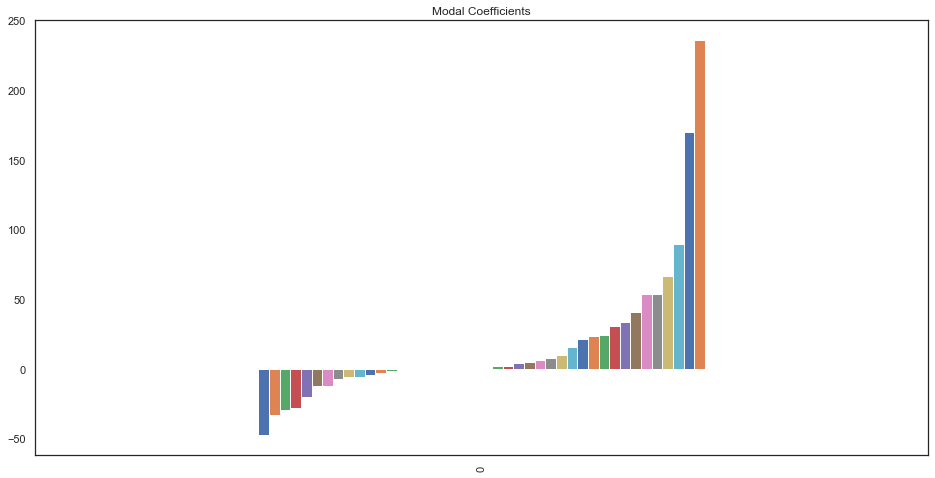

In [119]:
coef = pd.DataFrame(data=lm5_rfe.coef_ ).T
coef.columns = selected_rfe2

model_coef = coef.T.sort_values(by=0).T
model_coef.plot(kind='bar', title='Modal Coefficients', legend=False, figsize=(16,8),);

In [120]:
## training the model
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.01, normalize=False)

lasso.fit(X_train5,y_train5)

y_train_pred5 = lasso.predict(X_train5)
y_pred5 = lasso.predict(X_test5)

train5_rmse = metrics.mean_absolute_error(y_train5, y_train_pred5)
test5_rmse = np.sqrt(metrics.mean_squared_error(y_test5, y_pred5))
print('Training Error: '+ str(train5_rmse) )
print('Testing Error: '+ str(test5_rmse) )
print("This is the training r2 number:", r2_score(y_train5, y_train_pred5))
print("This is the test r2 number:", r2_score(y_test5, y_pred5))

Training Error: 115.80816927023147
Testing Error: 195.82901020328026
This is the training r2 number: 0.7381353445435714
This is the test r2 number: 0.666222001860492


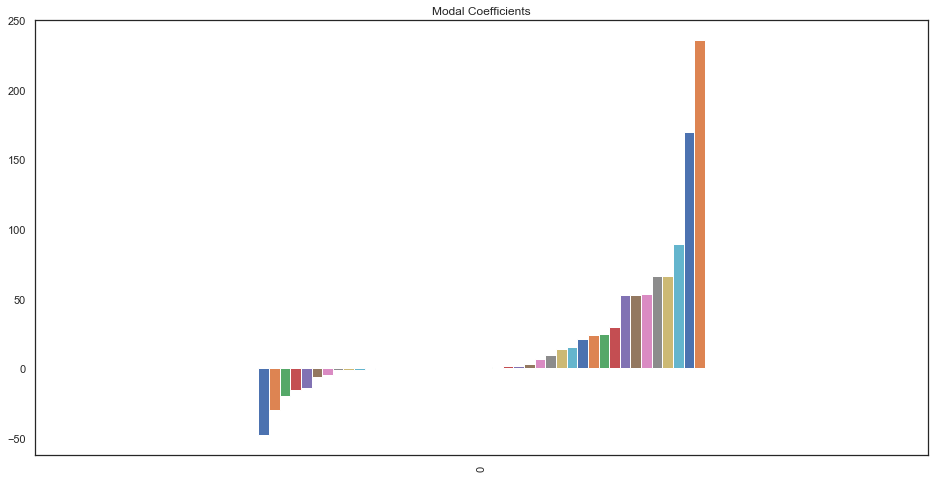

In [121]:
lasso_coef01 = pd.DataFrame(data=lasso.coef_).T
lasso_coef01.columns = X_train5.columns
lasso_coef01 = lasso_coef01.T.sort_values(by=0).T
lasso_coef01.plot(kind='bar', title='Modal Coefficients', legend=False, figsize=(16,8));

## Results

In [123]:
# Test Results
print('#1 Original Training Error: ', train_rmse, '#1 Original Testing Error: ', test_rmse)
print('#2 Poly Training Error: ', train2_rmse, '#2 Poly Testing Error: ', test2_rmse)
print('#3 F-Test Training Error: ', train3_rmse, '#3 F-Test Testing Error: ', test3_rmse)
print('#4 Recursive Training Error: ', train4_rmse, '#4 Recursive Testing Error: ', test4_rmse)
print('#5 Lasso Training Error: ', train5_rmse_lasso1, '#5 Lasso Testing Error: ', test5_rmse_lasso1)

#1 Original Training Error:  172.02446760608765 #1 Original Testing Error:  196.58156017150185
#2 Poly Training Error:  87.43126820497908 #2 Poly Testing Error:  3425072180673.2207
#3 F-Test Training Error:  176.68838666766968 #3 F-Test Testing Error:  203.70550540540967
#4 Recursive Training Error:  171.87208883649276 #4 Recursive Testing Error:  195.84138522503287
#5 Lasso Training Error:  115.63858719809843 #5 Lasso Testing Error:  195.7476059005185


In [138]:
# Test Results
print('#1 Original Training Error: ', train_rmse, '#1 Original Testing Error: ', test_rmse)
print('#1 Train R2', r2_score(y_train, y_train_pred), '#1 Test R2', r2_score(y_test, y_pred))
print('#2 Poly Training Error: ', train2_rmse, '#2 Poly Testing Error: ', test2_rmse)
print('#2 Train R2', r2_score(y_train2, y_train_pred2), '#2 Test R2', r2_score(y_test2, y_pred2))
print('#3 F-Test Training Error: ', train3_rmse, '#3 F-Test Testing Error: ', test3_rmse)
print('#3 Train R2', r2_score(y_train3, y_train_kbest), '#3 Test R2', r2_score(y_test3, y_kbest))
print('#4 Recursive Training Error: ', train4_rmse, '#4 Recursive Testing Error: ', test4_rmse)
print('#4 Train R2', r2_score(y_train4, y_rfe), '#4 Test R2', r2_score(y_test4, y_pred_rfe))
print('#5 Lasso Training Error: ', train5_rmse_lasso1, '#5 Lasso Testing Error: ', test5_rmse_lasso1)
print('#5 Train R2', r2_score(y_train5, y_train_pred5), '#5 Test R2', r2_score(y_test5, y_pred5))

#1 Original Training Error:  172.02446760608765 #1 Original Testing Error:  196.58156017150185
#1 Train R2 0.7328327537833788 #1 Test R2 0.6850644337462928
#2 Poly Training Error:  87.43126820497908 #2 Poly Testing Error:  3425072180673.2207
#2 Train R2 0.9309861389565699 #2 Test R2 -9.560390038500187e+19
#3 F-Test Training Error:  176.68838666766968 #3 F-Test Testing Error:  203.70550540540967
#3 Train R2 0.7181495194164935 #3 Test R2 0.6618248533061816
#4 Recursive Training Error:  171.87208883649276 #4 Recursive Testing Error:  195.84138522503287
#4 Train R2 0.7381359055139782 #4 Test R2 0.6661798156645562
#5 Lasso Training Error:  115.63858719809843 #5 Lasso Testing Error:  195.7476059005185
#5 Train R2 0.7381353445435714 #5 Test R2 0.666222001860492


In [124]:
df['mntwines'].describe()

count    2240.000000
mean      303.935714
std       336.597393
min         0.000000
25%        23.750000
50%       173.500000
75%       504.250000
max      1493.000000
Name: mntwines, dtype: float64

In [125]:
# standardized the RMSE to have a real sense of what the error means relative to the data 
test_std = y_train.std()
print('Root Mean Squared Error Z:' , train4_rmse/test_std)

Root Mean Squared Error Z: 0.5162799493672842


## Conclusion

- Based on the results:

- the recursive test was the most successful
- it produced a RMSE error Z Score of 0.5162799493672842
- this puts the ability to predict the amount customers will spend on wine within 1 standard deviation of the population mean

My recommendation to my client will be:

- target Millennials with a marketing campaign based on wine
- estimate budget spend using the prediction from the model to determine potential ROI